# Parse PATH monthly ridership PDF
```bash
papermill -p year $year [-p last_month $last_month] monthly.ipynb out/monthly-$year.ipynb
```

In [1]:
from utz import *
import json
from tabula import read_pdf

In [2]:
n = now()
cur_year = n.year
cur_month = n.month
cur_year, cur_month

(2024, 5)

Papermill parameters:

In [3]:
year = None
last_month = None
template = None

In [4]:
# Parameters
year = 2024
last_month = 3
template = "2023-PATH-Monthly-Ridership-Report.tabula-template.json"


In [5]:
if year is None:
    year = cur_year

if last_month is None:
    if year == cur_year:
        last_month = 3
    else:
        last_month = 12

if template is None:
    if year >= 2023:
        template = '2023-PATH-Monthly-Ridership-Report.tabula-template.json'
    else:
        template = 'PATH-Monthly-Ridership-Report.json'

In [6]:
pdf = f'data/{year}-PATH-Monthly-Ridership-Report.pdf'
pdf

'data/2024-PATH-Monthly-Ridership-Report.pdf'

In [7]:
with open(f'templates/{template}', 'r') as f:
    rects = json.load(f)
rects

[{'page': 1,
  'extraction_method': 'guess',
  'x1': 54.315,
  'x2': 577.575,
  'y1': 116.00001000000002,
  'y2': 238.40001,
  'width': 523.26,
  'height': 122.4},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 58.14,
  'x2': 577.575,
  'y1': 253.000035,
  'y2': 401.41003500000005,
  'width': 519.4350000000001,
  'height': 148.41},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 58.14,
  'x2': 577.575,
  'y1': 474.999975,
  'y2': 592.809975,
  'width': 519.4350000000001,
  'height': 117.81},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 56.61,
  'x2': 578.34,
  'y1': 611.000145,
  'y2': 753.290145,
  'width': 521.73,
  'height': 142.29}]

In [8]:
area = [ [ r[k] for k in [ 'y1', 'x1', 'y2', 'x2' ] ] for r in rects ]
area

[[116.00001000000002, 54.315, 238.40001, 577.575],
 [253.000035, 58.14, 401.41003500000005, 577.575],
 [474.999975, 58.14, 592.809975, 577.575],
 [611.000145, 56.61, 753.290145, 578.34]]

In [9]:
tables = {
    month: read_pdf(
        pdf,
        pages=month,
        area=area,
        pandas_options={'header': None},
        stream=True,
    ) 
    for month in range(1, last_month + 1)
}

tables

Error importing jpype dependencies. Fallback to subprocess.


No module named 'jpype'


{1: [                    0          1       2       3       4       5
  0  Christopher Street     86,831   3,147   2,511   1,784   1,784
  1          9th Street     75,977   2,792   2,108   1,401   1,651
  2         14th Street    127,321   4,834   3,037   2,180   2,472
  3         23rd Street    122,336   5,033   1,964   1,287   1,817
  4         33rd Street    500,254  19,543   9,702   6,865  11,787
  5     UPTOWN SUBTOTAL    912,719  35,350  19,322  13,517  19,510
  6                 WTC    922,430  37,278  15,316  11,296  16,569
  7   NEW YORK SUBTOTAL  1,835,149  72,628  34,638  24,813  36,079,
                       0          1        2       3       4       5
  0               Newark    344,156   14,267   5,102   3,413   5,244
  1             Harrison    130,445    5,417   2,086   1,154   1,862
  2       Journal Square    474,171   18,174  10,822   7,634   9,348
  3         Grove Street    366,378   14,545   7,620   4,638   5,955
  4       Exchange Place    248,376   10,112   4

In [10]:
cols1 = [ 'station', 'total', 'avg weekday', 'avg sat', 'avg sun', 'avg holiday' ]
cols2 = [ 'station', 'avg daily', 'total weekday', 'total sat', 'total sun', 'total holiday' ]

In [11]:
for k, v in tables.items():
    n = len(v)
    msg = f'Pg {k}: {n} tables'
    if n == 4:
        print(msg)
    else:
        err(msg)
len(tables)

Pg 1: 4 tables
Pg 2: 4 tables
Pg 3: 4 tables


3

In [12]:
avgs = pd.concat([
    df.assign(date=to_dt(f'{year}-{month}'))
    for month, dfs in tables.items()
    for df in dfs[:2]
])
avgs['date'] = avgs.date.dt.date
avgs

,0,1,2,3,4,5,date
0,Christopher Street,"86,831","3,147","2,511","1,784","1,784",2024-01-01
1,9th Street,"75,977","2,792","2,108","1,401","1,651",2024-01-01
2,14th Street,"127,321","4,834","3,037","2,180","2,472",2024-01-01
3,23rd Street,"122,336","5,033","1,964","1,287","1,817",2024-01-01
4,33rd Street,"500,254","19,543","9,702","6,865","11,787",2024-01-01
5,UPTOWN SUBTOTAL,"912,719","35,350","19,322","13,517","19,510",2024-01-01
6,WTC,"922,430","37,278","15,316","11,296","16,569",2024-01-01
7,NEW YORK SUBTOTAL,"1,835,149","72,628","34,638","24,813","36,079",2024-01-01
0,Newark,"344,156","14,267","5,102","3,413","5,244",2024-01-01
1,Harrison,"130,445","5,417","2,086","1,154","1,862",2024-01-01


In [13]:
avgs.columns = cols1 + ['month']
avgs = avgs.assign(**{
    k: avgs[k].astype(str).str.replace(',', '').astype(int)
    for k in cols1[1:]
})
avgs

,station,total,avg weekday,avg sat,avg sun,avg holiday,month
0,Christopher Street,86831,3147,2511,1784,1784,2024-01-01
1,9th Street,75977,2792,2108,1401,1651,2024-01-01
2,14th Street,127321,4834,3037,2180,2472,2024-01-01
3,23rd Street,122336,5033,1964,1287,1817,2024-01-01
4,33rd Street,500254,19543,9702,6865,11787,2024-01-01
5,UPTOWN SUBTOTAL,912719,35350,19322,13517,19510,2024-01-01
6,WTC,922430,37278,15316,11296,16569,2024-01-01
7,NEW YORK SUBTOTAL,1835149,72628,34638,24813,36079,2024-01-01
0,Newark,344156,14267,5102,3413,5244,2024-01-01
1,Harrison,130445,5417,2086,1154,1862,2024-01-01


In [14]:
avgs.isna().sum(axis=0)

station        0
total          0
avg weekday    0
avg sat        0
avg sun        0
avg holiday    0
month          0
dtype: int64

In [15]:
avgs.dtypes

station        object
total           int64
avg weekday     int64
avg sat         int64
avg sun         int64
avg holiday     int64
month          object
dtype: object

In [16]:
sums = pd.concat([
    df.assign(date=to_dt(f'{year}-{month}'))
    for month, dfs in tables.items()
    for df in dfs[2:]
])
sums['date'] = sums.date.dt.date
sums.columns = cols2 + ['month']
sums = sums.assign(**{
    k: sums[k].astype(str).str.replace(',', '').astype(int)
    for k in cols2[1:]
})
sums

,station,avg daily,total weekday,total sat,total sun,total holiday,month
0,Christopher Street,2801,66085,10043,7136,3567,2024-01-01
1,9th Street,2451,58641,8433,5602,3301,2024-01-01
2,14th Street,4107,101507,12149,8721,4944,2024-01-01
3,23rd Street,3946,105700,7855,5147,3634,2024-01-01
4,33rd Street,16137,410413,38806,27461,23574,2024-01-01
5,UPTOWN SUBTOTAL,29443,742346,77286,54067,39020,2024-01-01
6,WTC,29756,782844,61264,45185,33137,2024-01-01
7,NEW YORK SUBTOTAL,59198,1525190,138550,99252,72157,2024-01-01
0,Newark,11102,299611,20406,13651,10488,2024-01-01
1,Harrison,4208,113764,8344,4614,3723,2024-01-01


In [17]:
sums.isna().sum(axis=0)

station          0
avg daily        0
total weekday    0
total sat        0
total sun        0
total holiday    0
month            0
dtype: int64

In [18]:
sums.dtypes

station          object
avg daily         int64
total weekday     int64
total sat         int64
total sun         int64
total holiday     int64
month            object
dtype: object

In [19]:
df = sxs(
    avgs.set_index(['month', 'station']),
    sums.set_index(['month', 'station']),
)
df = df[[cols2[1]] + cols1[2:] + [cols1[1]] + cols2[2:]]
df

avg daily  avg weekday  avg sat  avg sun  \
month      station                                                         
2024-01-01 Christopher Street        2801         3147     2511     1784   
           9th Street                2451         2792     2108     1401   
           14th Street               4107         4834     3037     2180   
           23rd Street               3946         5033     1964     1287   
           33rd Street              16137        19543     9702     6865   
           UPTOWN SUBTOTAL          29443        35350    19322    13517   
           WTC                      29756        37278    15316    11296   
           NEW YORK SUBTOTAL        59198        72628    34638    24813   
           Newark                   11102        14267     5102     3413   
           Harrison                  4208         5417     2086     1154   
           Journal Square           15296        18174    10822     7634   
           Grove Street             11819        14545     7620     4638   
           Exchange Place            8012        10112     4418     2761   
           Newport                   8463        10678     4533     3073   
           Hoboken                  12830        15943     8225     4637   
           NEW JERSEY SUBTOTAL      71729        89137    42806    27309   
           MONTHLY TOTAL           130927       161765    77443    52122   
2024-02-01 Christopher Street        3140         3382     3104     2266   
           9th Street                3118         3531     2675     1826   
           14th Street               4425         5075     3417     2557   
           23rd Street               4005         4981     2135     1445   
           33rd Street              16483        19513    11085     8266   
           UPTOWN SUBTOTAL          31170        36482    22415    16360   
           WTC                      33143        40942    17737    13331   
           NEW YORK SUBTOTAL        64313        77424    40152    29690   
           Newark                   12078        15494     5842     2384   
           Harrison                  4453         5669     2424      840   
           Journal Square           17116        19737    12315    10140   
           Grove Street             12618        15113     8703     5393   
           Exchange Place            8467        10203     5454     3747   
           Newport                   9105        11213     5215     3589   
           Hoboken                  13782        16536     9594     5901   
           NEW JERSEY SUBTOTAL      77619        93965    49546    31993   
           MONTHLY TOTAL           141932       171389    89698    61683   
2024-03-01 Christopher Street        3280         3628     2685     2414   
           9th Street                2959         3360     2261     1971   
           14th Street               4418         5177     3035     2613   
           23rd Street               4080         5153     2038     1614   
           33rd Street              17314        20688    10930     9527   
           UPTOWN SUBTOTAL          32051        38006    20949    18139   
           WTC                      34677        43070    18299    15804   
           NEW YORK SUBTOTAL        66728        81076    39249    33943   
           Newark                   12490        15971     6015     4343   
           Harrison                  4963         6088     3190     2010   
           Journal Square           17461        20562    11378    10519   
           Grove Street             12549        15189     7623     6386   
           Exchange Place            8582        10348     5344     4402   
           Newport                   9331        11565     4998     4279   
           Hoboken                  13908        16845     9010     6468   
           NEW JERSEY SUBTOTAL      79283        96570    47558    38406   
           MONTHLY TOTAL           146011       177646    86807    72350   

   

In [20]:
path = f'data/{year}.pqt'
df.to_parquet(path)

In [21]:
import plotly.express as px
from IPython.display import Image

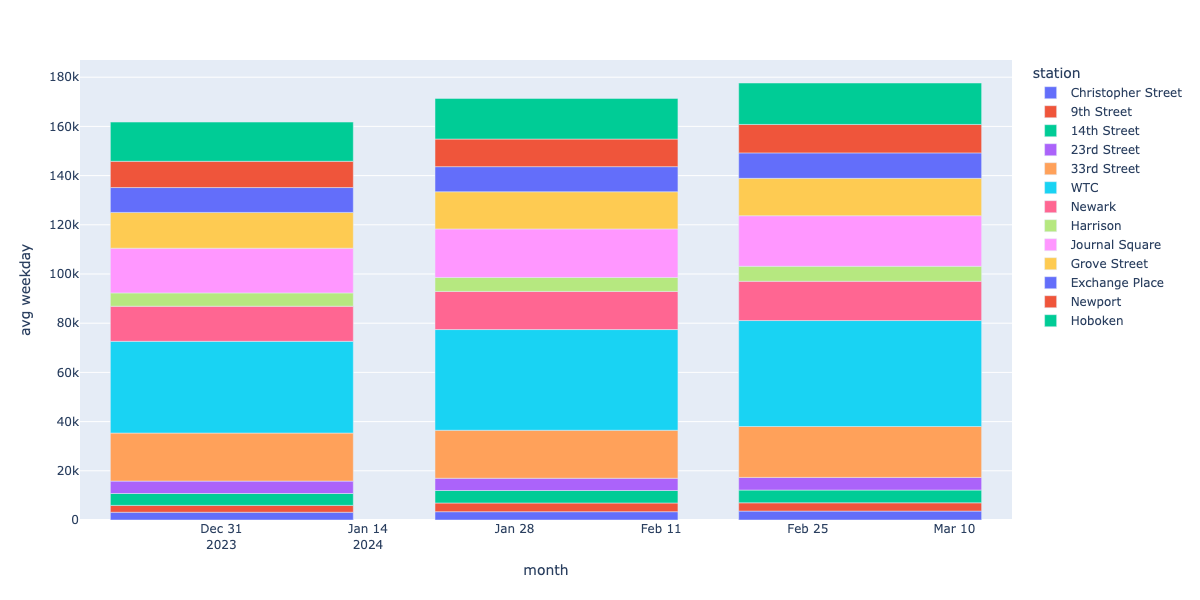

In [22]:
fig = px.bar(
    avgs[~avgs.station.str.contains('TOTAL')],
    x='month', y='avg weekday', color='station',
)
Image(fig.to_image(width=1200, height=600))